In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-prediction-using-logistic-regression/framingham.csv


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # Vizualisation
import seaborn as sns # Vizualisation

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-prediction-using-logistic-regression/framingham.csv


In [3]:
df = pd.read_csv('../input/heart-disease-prediction-using-logistic-regression/framingham.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
df.shape

(4238, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [6]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [7]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [8]:
X = df.drop('TenYearCHD', axis = 1)
y = df['TenYearCHD']

In [9]:
X = X.apply(lambda x: x.fillna(x.mean()),axis=0)
X.isnull().sum(axis = 0)

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
dtype: int64

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [11]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
# training the model
log_reg.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [12]:
y_pred = log_reg.predict(X_test)

In [13]:
print('Train Score is : ' , log_reg.score(X_train, y_train))
print('Test Score is : ' , log_reg.score(X_test, y_test))

Train Score is :  0.8460725607608313
Test Score is :  0.8577555396711937


In [14]:
from sklearn.metrics import classification_report

print('Classification Report is: \n \n' , classification_report(y_test, y_pred ))

Classification Report is: 
 
               precision    recall  f1-score   support

           0       0.86      0.99      0.92      1194
           1       0.67      0.06      0.11       205

    accuracy                           0.86      1399
   macro avg       0.76      0.53      0.52      1399
weighted avg       0.83      0.86      0.80      1399



The accuracy score is: 0.8577555396711937

 Confusion matrix 
 
 [[1188    6]
 [ 193   12]]
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1194
           1       0.67      0.06      0.11       205

    accuracy                           0.86      1399
   macro avg       0.76      0.53      0.52      1399
weighted avg       0.83      0.86      0.80      1399



/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


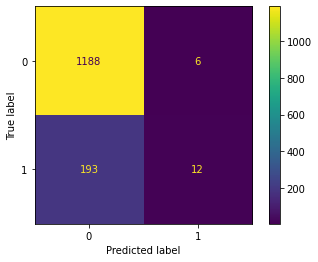

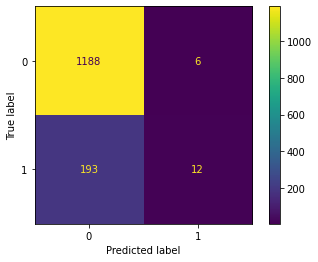

In [15]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay

print('The accuracy score is:', accuracy_score(y_test, y_pred)) # accuracy score

cm = confusion_matrix(y_test, y_pred) # Confusion matrix 
print('\n Confusion matrix \n \n', cm)
print(classification_report(y_test, y_pred ))

plot_confusion_matrix(log_reg, X_test, y_test) # old plotting method
plt.show()

disp = ConfusionMatrixDisplay(cm, display_labels=log_reg.classes_) # new plotting method 
disp.plot()
plt.show()

In [16]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc 

size = metrics.roc_auc_score(y_test, y_pred)
print(size)

0.5267557298688565


Text(0.5, 1.0, 'Receiver operating characteristic example')

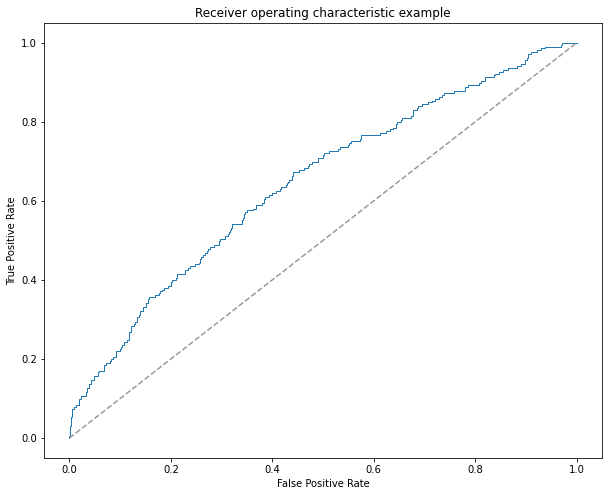

In [17]:
plt.figure(figsize=(10,8))
probas_ = log_reg.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='ROC fold (area = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Random')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')

In [18]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier() # build the model
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [19]:
y_pred = knn.predict(X_test)

In [20]:
print('Train Score is : ' , knn.score(X_train, y_train))
print('Test Score is : ' , knn.score(X_test, y_test))

Train Score is :  0.8594575554772808
Test Score is :  0.8334524660471766


In [21]:
from sklearn.metrics import classification_report

print('Classification Report is: \n \n' , classification_report(y_test, y_pred ))

Classification Report is: 
 
               precision    recall  f1-score   support

           0       0.86      0.96      0.91      1194
           1       0.29      0.10      0.15       205

    accuracy                           0.83      1399
   macro avg       0.58      0.53      0.53      1399
weighted avg       0.78      0.83      0.80      1399



The accuracy score is: 0.8334524660471766

 Confusion matrix 
 
 [[1146   48]
 [ 185   20]]
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1194
           1       0.29      0.10      0.15       205

    accuracy                           0.83      1399
   macro avg       0.58      0.53      0.53      1399
weighted avg       0.78      0.83      0.80      1399



/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


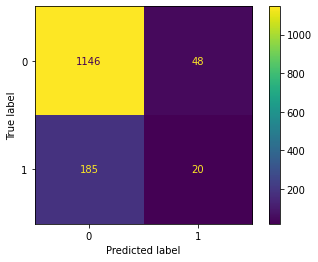

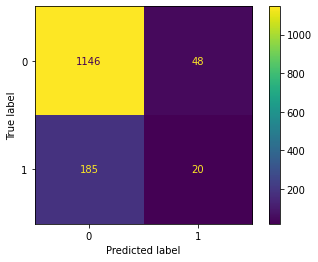

In [22]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay

print('The accuracy score is:', accuracy_score(y_test, y_pred)) # accuracy score

cm = confusion_matrix(y_test, y_pred) # Confusion matrix 
print('\n Confusion matrix \n \n', cm)
print(classification_report(y_test, y_pred ))

plot_confusion_matrix(knn, X_test, y_test) # old plotting method
plt.show()

disp = ConfusionMatrixDisplay(cm, display_labels=knn.classes_) # new plotting method 
disp.plot()
plt.show()

In [23]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc 

size = metrics.roc_auc_score(y_test, y_pred)
print(size)

0.5286799852923153


Text(0.5, 1.0, 'Receiver operating characteristic example')

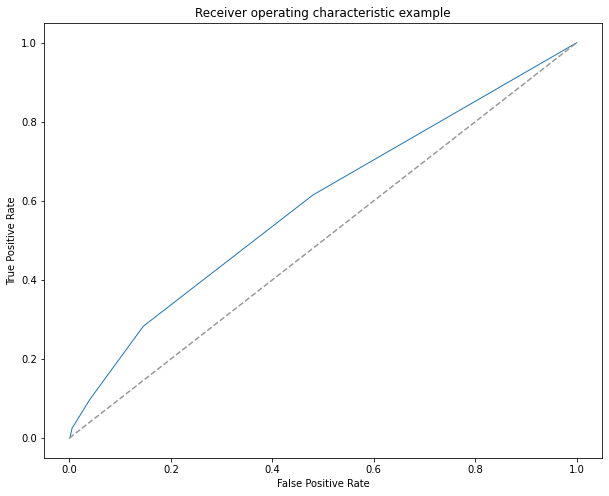

In [24]:
plt.figure(figsize=(10,8))
probas_ = knn.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='ROC fold (area = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Random')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')









In [25]:
from sklearn.svm import SVC 
svm = SVC(probability=True) # build the model
svm.fit(X_train, y_train)

SVC(probability=True)

In [26]:
y_pred = svm.predict(X_test)

In [27]:
print('Train Score is : ' , svm.score(X_train, y_train))
print('Test Score is : ' , svm.score(X_test, y_test))

Train Score is :  0.8467770341669602
Test Score is :  0.8527519656897784


In [28]:
from sklearn.metrics import classification_report

print('Classification Report is: \n \n' , classification_report(y_test, y_pred ))

Classification Report is: 
 
               precision    recall  f1-score   support

           0       0.85      1.00      0.92      1194
           1       0.40      0.01      0.02       205

    accuracy                           0.85      1399
   macro avg       0.63      0.50      0.47      1399
weighted avg       0.79      0.85      0.79      1399



The accuracy score is: 0.8527519656897784

 Confusion matrix 
 
 [[1191    3]
 [ 203    2]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1194
           1       0.40      0.01      0.02       205

    accuracy                           0.85      1399
   macro avg       0.63      0.50      0.47      1399
weighted avg       0.79      0.85      0.79      1399



/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


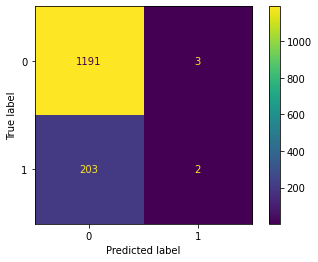

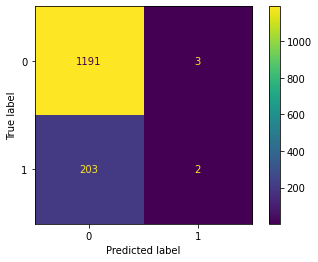

In [29]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay

print('The accuracy score is:', accuracy_score(y_test, y_pred)) # accuracy score

cm = confusion_matrix(y_test, y_pred) # Confusion matrix 
print('\n Confusion matrix \n \n', cm)
print(classification_report(y_test, y_pred ))

plot_confusion_matrix(svm, X_test, y_test) # old plotting method
plt.show()

disp = ConfusionMatrixDisplay(cm, display_labels=svm.classes_) # new plotting method 
disp.plot()
plt.show()

In [30]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc 

size = metrics.roc_auc_score(y_test, y_pred)
print(size)

0.5036217673734527


Text(0.5, 1.0, 'Receiver operating characteristic example')

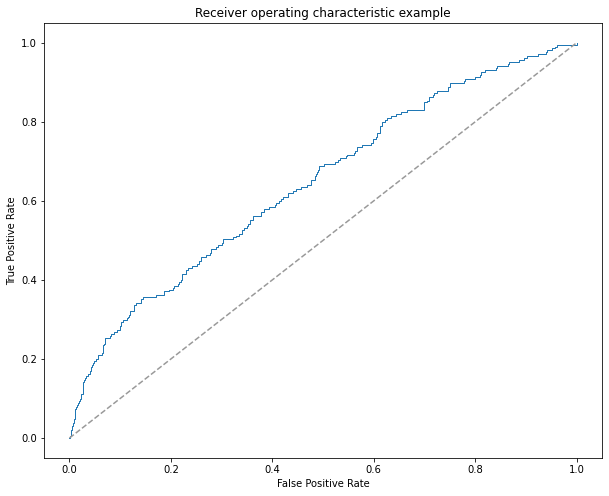

In [31]:
plt.figure(figsize=(10,8))
probas_ = svm.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='ROC fold (area = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Random')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')

In [32]:
from sklearn.preprocessing import StandardScaler

scaler =StandardScaler()
Xs = scaler.fit_transform(X)

In [33]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
fit = pca.fit(Xs)

print("Explained Variance: {}".format(fit.explained_variance_ratio_))
print(fit.components_)

Explained Variance: [0.21303599 0.12536707 0.10386113 0.0754632  0.07123582 0.07056071
 0.06670625 0.05749594 0.0535424  0.04570778]
[[-0.04750815  0.29738267 -0.11057012 -0.19709815 -0.16716169  0.20158599
   0.06590924  0.4338035   0.13465579  0.18739638  0.4839166   0.43745037
   0.28579128  0.12388495  0.1459857 ]
 [ 0.35067567 -0.10787048 -0.0219227   0.59006582  0.6315792   0.03891382
  -0.01704058  0.16154453 -0.01693727  0.01779272  0.15257871  0.19746449
   0.05094631  0.15448877 -0.02450344]
 [ 0.05548035  0.01726192 -0.02945241  0.0581382   0.05290501 -0.04675735
  -0.02298054 -0.11836277  0.68612346 -0.01776368 -0.09296252 -0.15159347
  -0.02663572  0.05653778  0.68282053]
 [ 0.56201946  0.09844577 -0.04389756 -0.11358909 -0.03352104  0.09193001
   0.28261935  0.01797392  0.03736821 -0.27525551 -0.03274533  0.00972754
   0.21289547 -0.6679694  -0.00225166]
 [-0.24145019 -0.06908409  0.3119043   0.11020682  0.04260983  0.57594585
   0.61924923  0.06140373  0.02827833 -0.0260

In [34]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
fit = pca.fit(Xs)

print("Explained Variance: {}".format(fit.explained_variance_ratio_))
print(fit.components_)

Explained Variance: [0.21303599 0.12536707 0.10386113 0.0754632  0.07123582 0.07056071
 0.06670625 0.05749594 0.0535424  0.04570778]
[[-0.04750815  0.29738267 -0.11057012 -0.19709815 -0.16716169  0.20158599
   0.06590924  0.4338035   0.13465579  0.18739638  0.4839166   0.43745037
   0.28579128  0.12388495  0.1459857 ]
 [ 0.35067567 -0.10787048 -0.0219227   0.59006582  0.6315792   0.03891382
  -0.01704058  0.16154453 -0.01693727  0.01779272  0.15257871  0.19746449
   0.05094631  0.15448877 -0.02450344]
 [ 0.05548035  0.01726192 -0.02945241  0.0581382   0.05290501 -0.04675735
  -0.02298054 -0.11836277  0.68612346 -0.01776368 -0.09296252 -0.15159347
  -0.02663572  0.05653778  0.68282053]
 [ 0.56201946  0.09844577 -0.04389756 -0.11358909 -0.03352104  0.09193001
   0.28261935  0.01797392  0.03736821 -0.27525551 -0.03274533  0.00972754
   0.21289547 -0.6679694  -0.00225166]
 [-0.24145019 -0.06908409  0.3119043   0.11020682  0.04260983  0.57594585
   0.61924923  0.06140373  0.02827833 -0.0260

In [35]:
var= pca.explained_variance_ratio_
#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(var1)

[21.3  33.84 44.23 51.78 58.9  65.96 72.63 78.38 83.73 88.3 ]


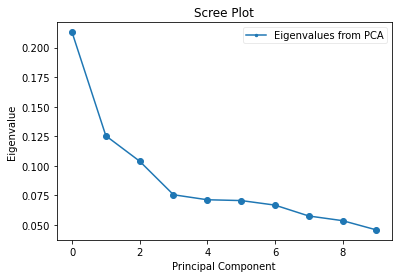

In [36]:
plt.plot(var, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')

leg = plt.legend(['Eigenvalues from PCA'], loc='best', borderpad=0.3,shadow=False,markerscale=0.4)
leg.get_frame().set_alpha(0.4)
plt.show()
